In [1]:
from src.model import PatchMLPModel, Game
from src.player import ThresholdPlayer
import numpy as np

In [2]:
device = 'cpu'

In [3]:

model = PatchMLPModel(2, layers=[200]*4, device= device)
model.load('weights/patch_mlp_4x4_200x4.pth')
player = ThresholdPlayer(model)

In [4]:
g = Game(16, 30, 99, n=1)
g.random_open(0.3)
g.random_flags(0.3)

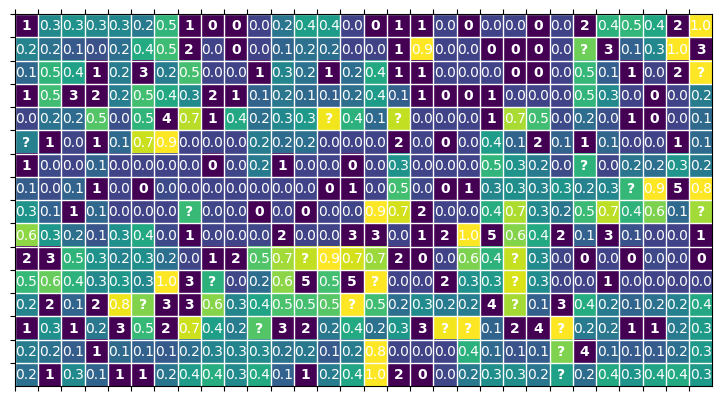

<Axes: >

In [5]:
p = model(g.game_state())
g.pyplot_game(0, mine_probs=p[0], hightlight_losing_only=True)

In [6]:
p, o, f = player.step(g)
print(g.active_games)
print(g.won)

[ True]
[False]


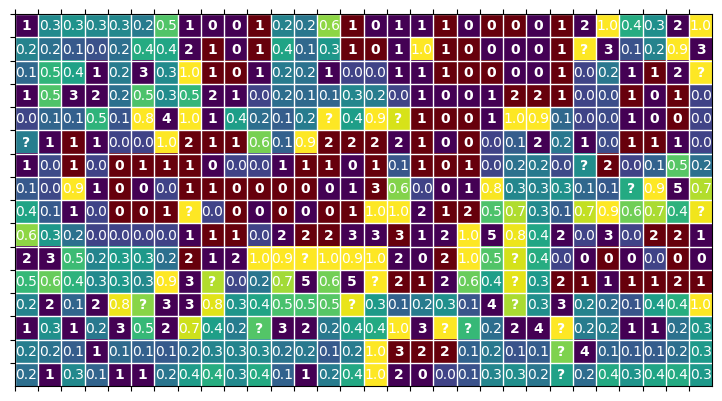

<Axes: >

In [7]:
p = model(g.game_state())
g.pyplot_game(0, mine_probs=p[0], hightlight_losing_only=False)